In [2]:
from tdc.single_pred import ADME
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm
from noiseestimator import NoiseEstimator

In [3]:
data = pd.read_csv('../data/external/BACE/bace.csv')
data.pIC50

0       9.154901
1       8.853872
2       8.698970
3       8.698970
4       8.698970
          ...   
1508    3.000000
1509    3.000000
1510    2.953115
1511    2.733298
1512    2.544546
Name: pIC50, Length: 1513, dtype: float64

In [4]:
data.pIC50.to_csv('../data/processed/bace_r.csv', index=False)

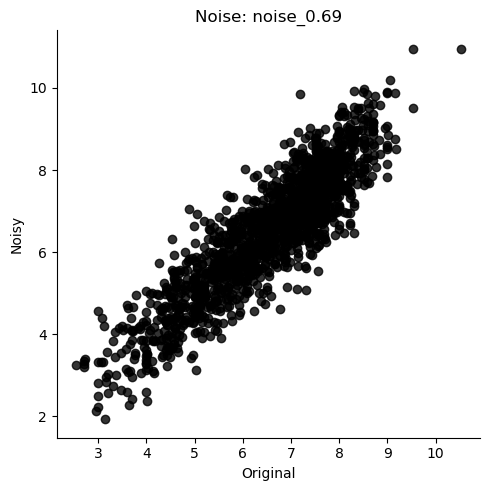

In [3]:
NE = NoiseEstimator(data.pIC50, 0.69)
NE.plot()

<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

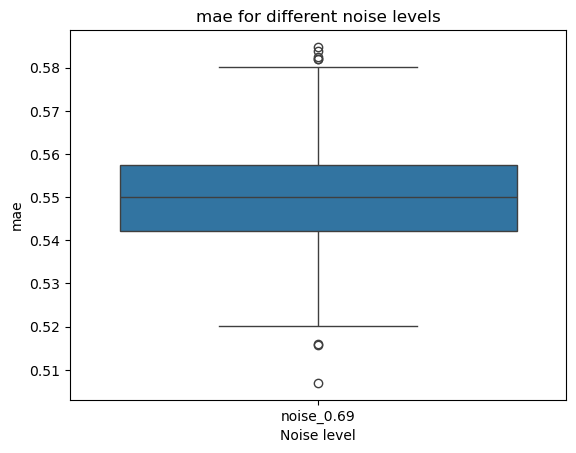

In [4]:
NE.plot_bootstrap(metric='mae')

In [5]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.69,0.550028,0.475235,0.689253,0.736112,0.889673


<Axes: title={'center': 'mae for different noise levels'}, xlabel='Noise level', ylabel='mae'>

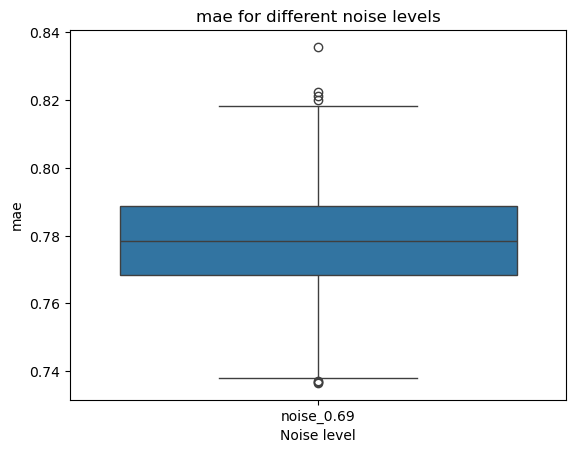

In [6]:
NE = NoiseEstimator(data.pIC50, 0.69, 0.69)
NE.plot_bootstrap(metric='mae')

In [7]:
NE.noise_bootstraps.groupby('noise').mean()

,mae,mse,rmse,r2,pearsonr
noise,,,,,
noise_0.69,0.778639,0.951726,0.975396,0.582074,0.791312


In [8]:
NE.noise_bootstraps.rmse.to_csv('../data/interim/BACE_RMSE.csv')

In [9]:
# now test for classification conversion.....
classification_labels = np.where(data.pIC50 >= 7, 1, 0)

In [10]:
data[classification_labels != data.Class.to_numpy()]
# some are mislabeled already... ?? 

,mol,CID,Class,Model,pIC50,MW,AlogP,HBA,HBD,RB,...,PEOE6 (PEOE6),PEOE7 (PEOE7),PEOE8 (PEOE8),PEOE9 (PEOE9),PEOE10 (PEOE10),PEOE11 (PEOE11),PEOE12 (PEOE12),PEOE13 (PEOE13),PEOE14 (PEOE14),canvasUID
231,O(C)c1cc(ccc1)-c1cc(ccc1)C1(NC(=[NH2+])N(C)C1=...,BACE_258,1,Valid,6.721246,372.43970,2.1852,2,1,4,...,85.799973,34.945156,57.883694,177.845550,10.035862,-6.106466,7.980170,0.000000,34.041992,258
232,O(C)c1cc(ccc1)-c1cc(ccc1)C1(N=C(N)N(C)C(=O)C1)C,BACE_259,1,Valid,6.568636,323.38889,2.6677,3,0,3,...,42.899986,42.604626,112.670910,122.662700,20.071724,9.378205,7.980170,0.000000,0.000000,259
233,O(C)c1cc(ccc1)CN1CC(NC1=O)C(=O)NC(Cc1ccccc1)C(...,BACE_260,1,Valid,6.347753,546.68042,2.4160,4,4,13,...,77.219978,68.412292,175.713710,243.590190,34.010311,0.000000,16.168497,10.018279,24.663788,260
234,O=C1N(C)C(=[NH2+])NC1(c1cc(ccc1)-c1cccnc1)c1cc...,BACE_261,1,Valid,6.275724,343.40179,1.0510,2,1,3,...,77.219978,24.408833,68.990173,139.908040,10.035862,-6.106466,7.980170,0.000000,34.041992,261
235,O(c1cc2CN(C(CCC(=O)N(C)C3CCCCC3)C3CCCCC3)C(=[N...,BACE_262,1,Valid,6.045757,503.69870,4.7490,2,0,8,...,52.436165,67.477531,373.415070,96.227631,20.071724,0.000000,12.664534,0.000000,21.710098,262
236,O=C1N(C)C(=[NH2+])NC1(c1ccccc1)c1ccccc1,BACE_263,1,Valid,5.443697,266.31769,0.6832,1,1,2,...,85.799973,5.292510,45.190060,107.621570,10.035862,-6.106466,7.980170,0.000000,34.041992,263
237,O=C1NC(CN1Cc1ccccc1)(Cc1ccccc1)C(=O)NC(Cc1cccc...,BACE_264,1,Valid,5.300943,606.77698,4.3000,3,4,14,...,145.859950,53.898548,189.099290,259.268190,28.153950,0.000000,16.168497,10.018279,24.663788,264
238,n1c2c(cc(cc2)-c2ccccc2C#CC(C)(C)C)ccc1N,BACE_265,1,Valid,5.214670,300.39691,5.3207,1,1,2,...,73.817162,39.699997,92.145988,115.195650,27.097986,0.000000,0.000000,0.000000,0.000000,265
239,O=C(NCC1CCCCC1)CCc1cc2c(nc1N)cccc2,BACE_266,1,Valid,4.847712,311.42130,3.6994,2,2,5,...,39.088078,31.462297,198.858540,58.109009,37.133846,0.000000,7.980170,0.000000,0.000000,266
240,O=C(N(C)C1CCCCC1)CCc1cc2c(nc1N)cccc2,BACE_267,1,Valid,4.415669,311.42130,3.5748,2,1,4,...,39.088078,45.187031,203.959610,58.109009,27.097986,0.000000,7.980170,0.000000,0.000000,267


In [11]:
classification_labels != data.Class.to_numpy()

array([False, False, False, ..., False, False, False])

<Axes: >

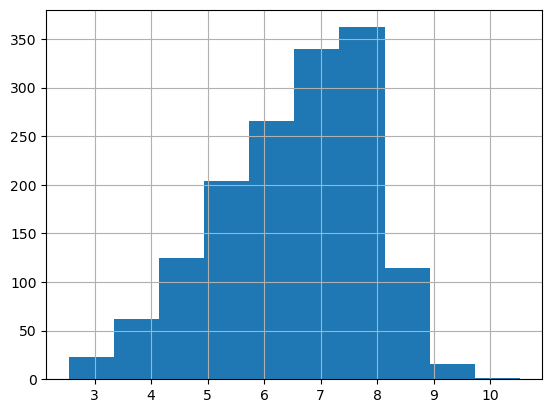

In [12]:
data.pIC50.hist()

In [13]:
NE = NoiseEstimator(data.pIC50, 0.69, 0.69, classifier=True, class_barrier=7)  # , class_labels=data.Class.to_numpy()

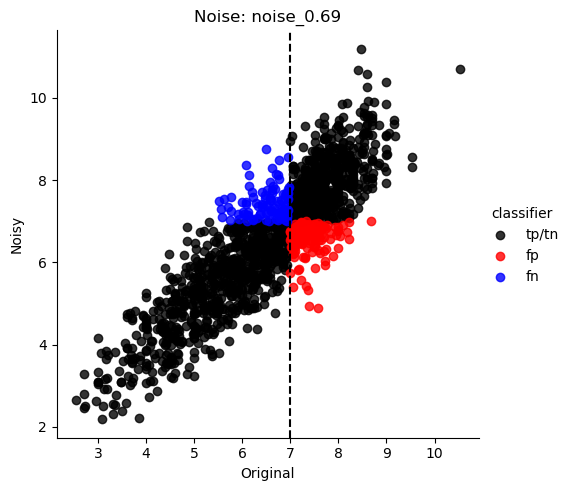

In [14]:
NE.plot()

In [15]:
NE.noise_bootstraps.groupby('noise').mean()

,matthews_corrcoef,roc_auc
noise,,
noise_0.69,0.691857,0.842963


<Axes: title={'center': 'roc_auc for different noise levels'}, xlabel='Noise level', ylabel='roc_auc'>

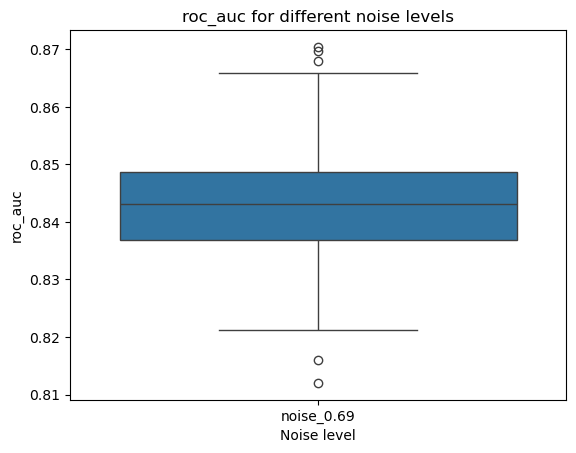

In [16]:
NE.plot_bootstrap(metric='roc_auc')

In [17]:
NE.noise_bootstraps.roc_auc.to_csv('../data/interim/BACE_roc_auc.csv')